## Logistic Regression with a Neural Network

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py #For H5 files
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

In [2]:
#Load dataset function

def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [26]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [7]:
train_set_x_orig.shape
train_set_y.shape
test_set_x_orig.shape
test_set_y.shape

(209, 64, 64, 3)

(1, 209)

(50, 64, 64, 3)

(1, 50)

In [10]:
print("Number of Training examples", str(train_set_x_orig.shape[0]))
print("Number of Test examples", str(test_set_x_orig.shape[0]))

Number of Training examples 209
Number of Test examples 50


#### Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors
_<center>(num_px  ∗num_px  ∗3, 1)<center>_

In [12]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],train_set_x_orig.shape[0])
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3],test_set_x_orig.shape[0])

In [13]:
train_set_x_flatten.shape
test_set_x_flatten.shape

(12288, 209)

(12288, 50)

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

In [14]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b $$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

In [18]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [23]:
print ("sigmoid([0, 2]) = "+str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


#### Inıtialize

In [27]:
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0.0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w,b

In [28]:
dim = 2
w, b = initialize(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


In [29]:
w.shape

(2, 1)

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [32]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X)+b)
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m
    
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m
    
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [33]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

In [55]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
    costs = []
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        if i % 100 == 0:
            costs.append(cost)
        if  print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        params = {"w": w,
              "b": b}
    
        grads = {"dw": dw,
                 "db": db}
    
    return params, grads, costs

In [56]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 5.801545
w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [57]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T,X) + b)          
    Y_prediction = (A >= 0.5) * 1.0
    
    return Y_prediction

In [58]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [72]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [73]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.709726
Cost after iteration 200: 0.657712
Cost after iteration 300: 0.614611
Cost after iteration 400: 0.578001
Cost after iteration 500: 0.546372
Cost after iteration 600: 0.518331
Cost after iteration 700: 0.492852
Cost after iteration 800: 0.469259
Cost after iteration 900: 0.447139
Cost after iteration 1000: 0.426262
Cost after iteration 1100: 0.406617
Cost after iteration 1200: 0.388723
Cost after iteration 1300: 0.374678
Cost after iteration 1400: 0.365826
Cost after iteration 1500: 0.358532
Cost after iteration 1600: 0.351612
Cost after iteration 1700: 0.345012
Cost after iteration 1800: 0.338704
Cost after iteration 1900: 0.332664
train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


learning rate is: 0.01
Cost after iteration 0: 0.693147
Cost after iteration 100: 2.321809
Cost after iteration 200: 2.552719
Cost after iteration 300: 0.503786
Cost after iteration 400: 1.072611
Cost after iteration 500: 2.518153
Cost after iteration 600: 2.055547
Cost after iteration 700: 1.715711
Cost after iteration 800: 1.310231
Cost after iteration 900: 1.209271
Cost after iteration 1000: 1.132982
Cost after iteration 1100: 1.070044
Cost after iteration 1200: 1.014862
Cost after iteration 1300: 0.964630
Cost after iteration 1400: 0.917896
train accuracy: 71.29186602870814 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.001
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.605784
Cost after iteration 200: 0.589938
Cost after iteration 300: 0.577890
Cost after iteration 400: 0.567791
Cost after iteration 500: 0.559013
Cost after iteration 600: 0.551207
Cost after iteration 700: 0.544146
Cost after iteration 800: 0.537

Text(0, 0.5, 'cost')

Text(0.5, 0, 'iterations (hundreds)')

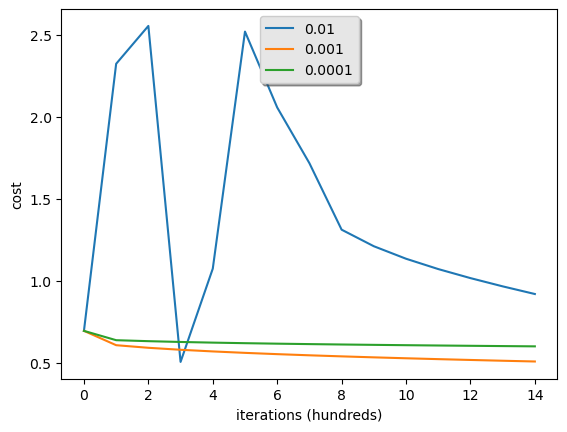

In [76]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()